In [1]:
from modelclass import  model
from numpy import arange
from copy import deepcopy

In [2]:
mcorona,baseline  = model.modelload('coronatest.json')  # Get the model and data

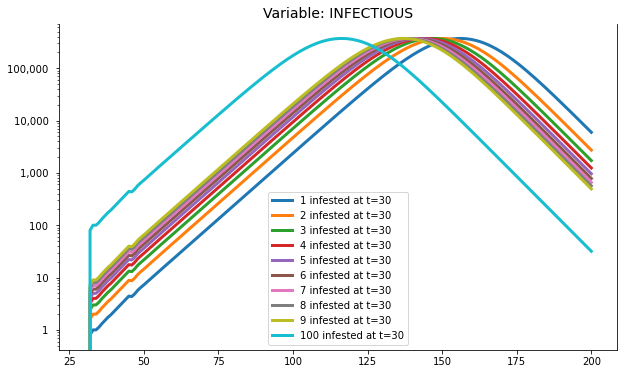

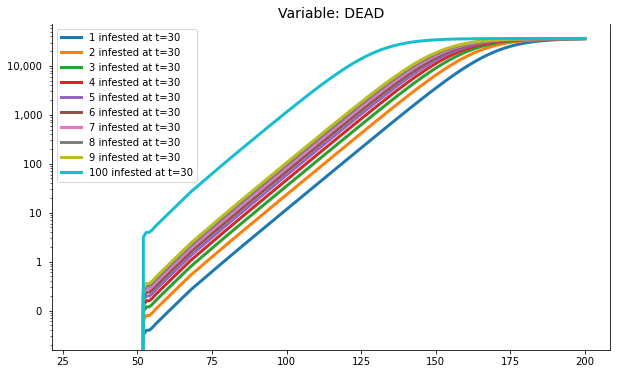

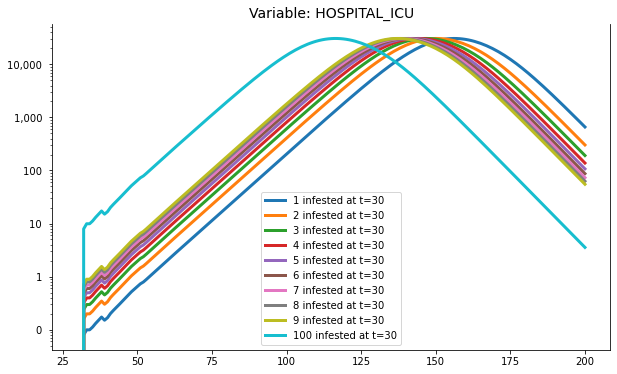

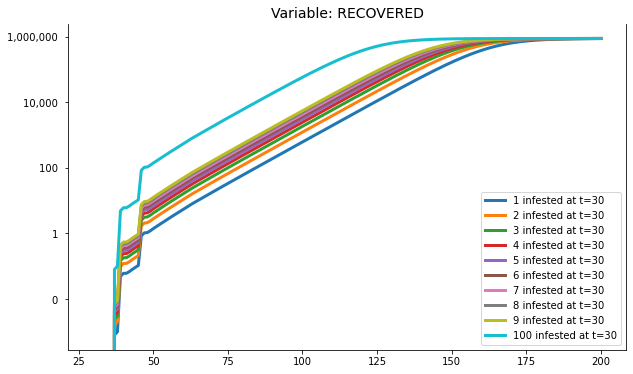

In [3]:
mcorona_infected= deepcopy(mcorona)                     # make a model instance  for this experiment 
for infested in [1,2,3,4,5,6,7,8,9,100]:                # Loop over values for number of infested from outside 
    experiment = f'EXO_EXPOSED = {infested} 30 30'      # Specify the update
    experiment_dataframe = model.update_from_list(baseline,experiment)           # create dataframe from baseline and update
    mcorona_infected(experiment_dataframe,keep = f'{infested} infested at t=30');# Run the model on the updated dataframe

with mcorona_infected.set_smpl(30,200):       # we only need to look at day 30 to dy 200           
    figs = mcorona_infected.keep_plot('infectious dead hospital_icu reco*',diff=0,legend=1,dec='',showtype='level',scale='log');

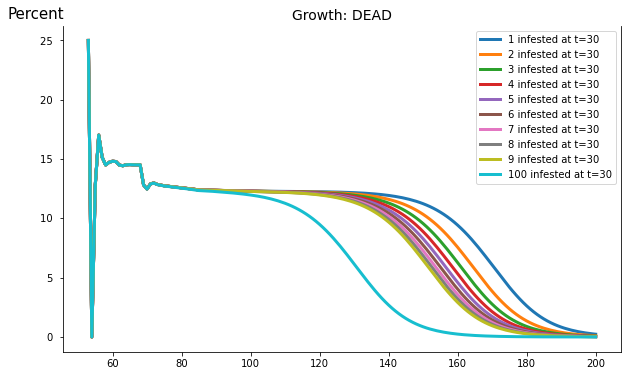

In [11]:
with mcorona_infected.set_smpl(30,200):
    figs = mcorona_infected.keep_plot('dead',diff=0,legend=1,dec='0',showtype='growth');

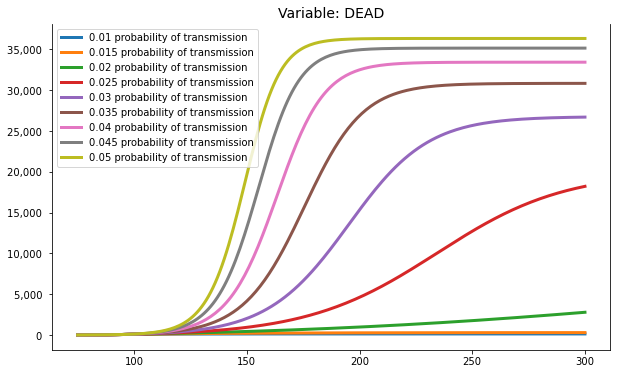

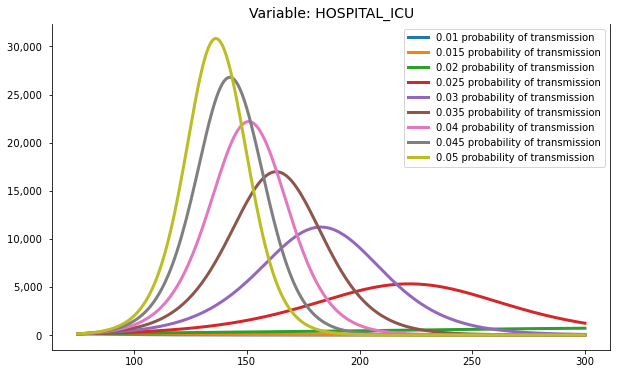

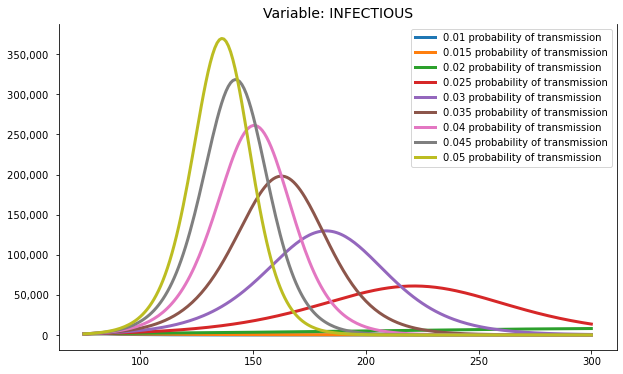

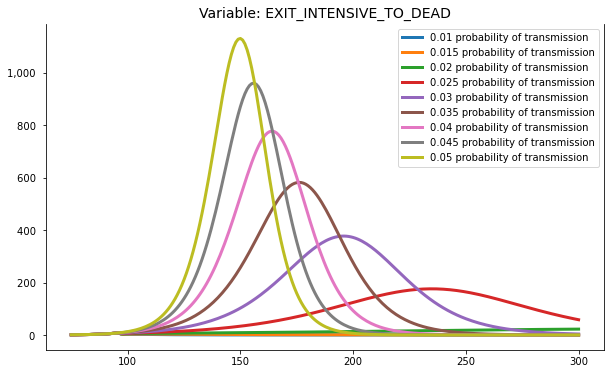

In [4]:
mcorona_new_policy= deepcopy(mcorona)  # make a model instance  for this experiment 

for PROBABILITY_TRANSMISION in arange(0.01,0.051,0.005):                # Loop over values for probability of transmission 
    experiment = f'''
    EXO_EXPOSED                    = 10       {30} {30}
    RATE_CONTACT                   = 4
    PROBABILITY_TRANSMISION        = 0.05
    PROBABILITY_TRANSMISION        = {PROBABILITY_TRANSMISION} 75 400
    '''
 
    experiment_dataframe = model.update_from_list(baseline,experiment)                                            # Update the baseline dataframe
    mcorona_new_policy(experiment_dataframe,keep = f'{PROBABILITY_TRANSMISION:.2} probability of transmission'
                      ,max_iterations=500);  # Run the model on the updated dataframe

with mcorona_new_policy.set_smpl(75,300):
    figs = mcorona_new_policy.keep_plot('dead hospital_icu infectious exit_intensive_to_dead',diff=0,legend=1,dec='0',
                                        showtype='level',scale='linear');